## LLECBuildingGym RL Workshop

Welcome to the Reinforcement Learning workshop for the `LLECBuildingGym` environment ([repository](https://github.com/KIT-IAI/LLECBuildingGym)). This notebook guides you through reproducing the baseline experiments and visualising their outcomes. Before running the cells, make sure the commands below are executed in a terminal within the project environment.

### Step 1 – Train the PPO Agent
Run the training script once before executing the notebook cells:
```bash
python run_train_rl.py \
  --algorithm ppo \
  --reward_mode temperature \
  --obs_variant T01 \
  --training \
  --seed 18 \
  --timesteps 1e6
```

### Step 2 – Evaluate the Trained PPO Agent
After training completes, generate evaluation trajectories:
```bash
python ../run_evaluation.py --algorithms ppo --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv" --model_folder_path "../models" --model_seed 18
```

In [1]:
!python ../run_evaluation.py --algorithms ppo --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv" --model_folder_path "../models" --model_seed 18

2025-11-16 19:39:06,211 - INFO - [INFO] Evaluation Setup
2025-11-16 19:39:06,213 - INFO - --------------------------------------------------------
2025-11-16 19:39:06,213 - INFO - Algorithm        : ppo
2025-11-16 19:39:06,213 - INFO - Reward Mode      : temperature
2025-11-16 19:39:06,213 - INFO - Episodes         : 10
2025-11-16 19:39:06,213 - INFO - Seed             : 58
2025-11-16 19:39:06,213 - INFO - Model Seed       : 18
2025-11-16 19:39:06,213 - INFO - Observation      : T01
2025-11-16 19:39:06,213 - INFO - Prediction Hzn   : 12
2025-11-16 19:39:06,214 - INFO - Energy Price Data: ../data/price_data_2025.csv
2025-11-16 19:39:06,214 - INFO - Temperature Data : ../data/LLEC_outdoor_temperature_5min_data.csv
2025-11-16 19:39:06,214 - INFO - Prefer Best      : False
2025-11-16 19:39:06,214 - INFO - Start Time       : 2025-11-16 19:39:06
2025-11-16 19:39:06,214 - INFO - --------------------------------------------------------
2025-11-16 19:39:06,214 - INFO - Starting evaluation for: 

### Step 3 – Evaluate Rule-Based Controllers
Repeat the evaluation call for each baseline to obtain comparable trajectories:
```bash
python ../run_evaluation.py --algorithms "PI Control"  --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv"
python ../run_evaluation.py --algorithms "PID Control" --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv"
python ../run_evaluation.py --algorithms "Fuzzy Control" --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv"
```

In [2]:
# Optional: evaluate the PI controller from within the notebook
!python ../run_evaluation.py --algorithms "PI Control" --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv"

2025-11-16 19:39:32,773 - INFO - [INFO] Evaluation Setup
2025-11-16 19:39:32,775 - INFO - --------------------------------------------------------
2025-11-16 19:39:32,775 - INFO - Algorithm        : PI Control
2025-11-16 19:39:32,775 - INFO - Reward Mode      : temperature
2025-11-16 19:39:32,775 - INFO - Episodes         : 10
2025-11-16 19:39:32,776 - INFO - Seed             : 58
2025-11-16 19:39:32,776 - INFO - Model Seed       : 42
2025-11-16 19:39:32,776 - INFO - Observation      : T01
2025-11-16 19:39:32,776 - INFO - Prediction Hzn   : 12
2025-11-16 19:39:32,776 - INFO - Energy Price Data: ../data/price_data_2025.csv
2025-11-16 19:39:32,776 - INFO - Temperature Data : ../data/LLEC_outdoor_temperature_5min_data.csv
2025-11-16 19:39:32,776 - INFO - Prefer Best      : False
2025-11-16 19:39:32,776 - INFO - Start Time       : 2025-11-16 19:39:32
2025-11-16 19:39:32,776 - INFO - --------------------------------------------------------
2025-11-16 19:39:32,776 - INFO - Starting evaluatio

In [3]:
# Optional: evaluate the PID controller from within the notebook
!python ../run_evaluation.py --algorithms "PID Control" --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv"

2025-11-16 19:39:40,782 - INFO - [INFO] Evaluation Setup
2025-11-16 19:39:40,783 - INFO - --------------------------------------------------------
2025-11-16 19:39:40,783 - INFO - Algorithm        : PID Control
2025-11-16 19:39:40,783 - INFO - Reward Mode      : temperature
2025-11-16 19:39:40,783 - INFO - Episodes         : 10
2025-11-16 19:39:40,783 - INFO - Seed             : 58
2025-11-16 19:39:40,783 - INFO - Model Seed       : 42
2025-11-16 19:39:40,783 - INFO - Observation      : T01
2025-11-16 19:39:40,783 - INFO - Prediction Hzn   : 12
2025-11-16 19:39:40,783 - INFO - Energy Price Data: ../data/price_data_2025.csv
2025-11-16 19:39:40,784 - INFO - Temperature Data : ../data/LLEC_outdoor_temperature_5min_data.csv
2025-11-16 19:39:40,784 - INFO - Prefer Best      : False
2025-11-16 19:39:40,784 - INFO - Start Time       : 2025-11-16 19:39:40
2025-11-16 19:39:40,784 - INFO - --------------------------------------------------------
2025-11-16 19:39:40,784 - INFO - Starting evaluati

In [4]:
# Optional: evaluate the Fuzzy controller from within the notebook
!python ../run_evaluation.py --algorithms "Fuzzy Control" --reward_mode temperature --obs_variant T01 --outdoor_temperature_path "../data/LLEC_outdoor_temperature_5min_data.csv" --energy_price_path "../data/price_data_2025.csv"

2025-11-16 19:39:48,042 - INFO - [INFO] Evaluation Setup
2025-11-16 19:39:48,044 - INFO - --------------------------------------------------------
2025-11-16 19:39:48,044 - INFO - Algorithm        : Fuzzy Control
2025-11-16 19:39:48,044 - INFO - Reward Mode      : temperature
2025-11-16 19:39:48,044 - INFO - Episodes         : 10
2025-11-16 19:39:48,044 - INFO - Seed             : 58
2025-11-16 19:39:48,044 - INFO - Model Seed       : 42
2025-11-16 19:39:48,044 - INFO - Observation      : T01
2025-11-16 19:39:48,044 - INFO - Prediction Hzn   : 12
2025-11-16 19:39:48,044 - INFO - Energy Price Data: ../data/price_data_2025.csv
2025-11-16 19:39:48,044 - INFO - Temperature Data : ../data/LLEC_outdoor_temperature_5min_data.csv
2025-11-16 19:39:48,044 - INFO - Prefer Best      : False
2025-11-16 19:39:48,044 - INFO - Start Time       : 2025-11-16 19:39:48
2025-11-16 19:39:48,044 - INFO - --------------------------------------------------------
2025-11-16 19:39:48,044 - INFO - Starting evalua

The commands above create:
- `results/temperature/outdoor_data/eval_T01_ppo.csv`
- `results/temperature/outdoor_data/eval_T01_PI_Control.csv`
- `results/temperature/outdoor_data/eval_T01_PID_Control.csv`
- `results/temperature/outdoor_data/eval_T01_Fuzzy_Control.csv`

### Step 4 – Execute the Notebook
With the artefacts in place, run the remaining cells below to load the data and render the plots during the workshop session.

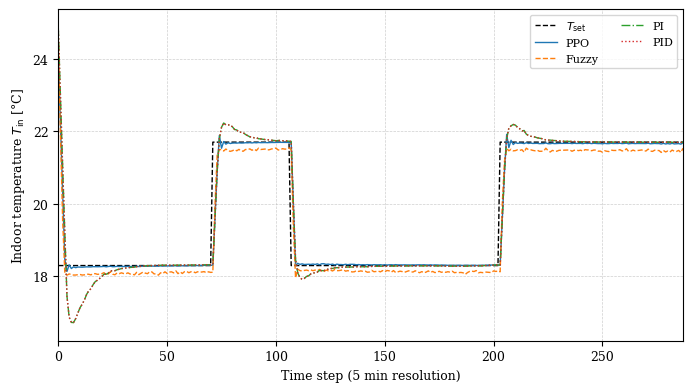

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Font and figure settings
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.size": 9,
        "axes.labelsize": 9,
        "legend.fontsize": 8,
        "axes.titlesize": 9,
        "axes.edgecolor": "black",
        "axes.linewidth": 0.8,
    }
)

# File paths for PPO,Fuzzy, PI, PID controllers
file_paths = {
    "PPO": "../results/temperature/outdoor_data/eval_T01_ppo.csv",
    "Fuzzy": "../results/temperature/outdoor_data/eval_T01_Fuzzy_Control.csv",
    "PI": "../results/temperature/outdoor_data/eval_T01_PI_Control.csv",
    "PID": "../results/temperature/outdoor_data/eval_T01_PID_Control.csv",
}

# Episode to plot
EPISODE_TO_PLOT = 1
TIME_MIN = 0
TIME_MAX = 287

# Line styles
plot_style = {
    "PPO": {"color": "C0", "linestyle": "-", "label": "PPO"},
    "Fuzzy": {"color": "C1", "linestyle": "--", "label": "Fuzzy"},
    "PI": {"color": "C2", "linestyle": "-.", "label": "PI"},
    "PID": {"color": "C3", "linestyle": ":", "label": "PID"},
}

# Load all data
data = {}
for name, path in file_paths.items():
    df = pd.read_csv(path, sep=",", engine="python")

    if "episode" in df.columns:
        df = df[df["episode"] == EPISODE_TO_PLOT].copy()

    if "time_step" in df.columns:
        df = df[df["time_step"].between(TIME_MIN, TIME_MAX)].copy()
        df = df.sort_values("time_step")

    data[name] = df

# Create figure
fig, ax = plt.subplots(figsize=(7, 4))

x = data["PPO"]["time_step"].values

# Plot T_set once
if "T_set" in data["PPO"].columns:
    ax.plot(
        x,
        data["PPO"]["T_set"].values,
        color="black",
        linestyle="--",
        linewidth=1.0,
        label=r"$T_{\mathrm{set}}$",
    )

# Plot T_in for all algorithms
for name, df_alg in data.items():
    if "T_in" not in df_alg.columns:
        continue
    style = plot_style.get(name, {})
    ax.plot(
        df_alg["time_step"].values,
        df_alg["T_in"].values,
        linewidth=1.0,
        **style,
    )

# Axis labels
ax.set_xlabel("Time step (5 min resolution)")
ax.set_ylabel(r"Indoor temperature $T_{\mathrm{in}}$ [°C]")

# Axis limits
ax.set_xlim(TIME_MIN, TIME_MAX)

# y-limits with padding
all_T = []
for df_alg in data.values():
    if "T_in" in df_alg.columns:
        all_T.append(df_alg["T_in"].values)

if all_T:
    all_T = np.concatenate(all_T)
    padding = 0.5
    ax.set_ylim(np.min(all_T) - padding, np.max(all_T) + padding)

# Grid, legend, layout
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
ax.legend(loc="best", ncol=2)

fig.tight_layout()
fig.savefig("temperature_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Workshop Completion
Once the visualisations have been reviewed, feel free to adapt the plotting cell to showcase additional metrics or alternative observation variants.

In [6]:
print(
    "Workshop workflow complete. Explore further scenarios by adjusting the inputs above."
)

Workshop workflow complete. Explore further scenarios by adjusting the inputs above.
